# Recommendation - IMDb Data

This notebook will explore the relationship between two features, genre and runtime, and two popularity metrics, viewer rating and the number of viewer ratings. The goal is to find some combination(s) of genre and runtime which provide lift to either of the two popularity metrics.

In [193]:
# load relevant packages and the imdb data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the movie_id column as the index
imdb = pd.read_csv('Data/imdb_data', index_col='movie_id')

In [194]:
# take a look
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [195]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, sunghursh2013 to chico albuquerque - revelações2013
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   runtime_minutes  114405 non-null  float64
 2   genres           140736 non-null  object 
 3   averagerating    73856 non-null   float64
 4   numvotes         73856 non-null   float64
dtypes: float64(3), object(2)
memory usage: 6.7+ MB


## Data Cleaning

### Drop duplicate movie_id's

In [196]:
# check how many duplicated indices and their identities
print(imdb.index.duplicated().sum())
imdb.index.value_counts()[imdb.index.value_counts() > 1]

2161


ângelo de sousa - tudo o que sou capaz2010    7
split2016                                     6
inside out2011                                5
gone2011                                      4
the unseen2017                                4
                                             ..
foxtrot2017                                   2
transit2010                                   2
olympia2018                                   2
the factory2012                               2
here and now2018                              2
Name: movie_id, Length: 1953, dtype: int64

There are 1,953 movie_ids which are duplicated 2,161 times in total. Let's investigate a few.

In [197]:
imdb.loc['ângelo de sousa - tudo o que sou capaz2010']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN


In [198]:
imdb.loc['split2016']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
split2016,Split,90.0,"Comedy,Romance,Sport",2.9,557.0
split2016,Split,127.0,"Drama,Fantasy",3.6,380.0
split2016,Split,NaN,Crime,6.8,5.0
split2016,Split,117.0,"Horror,Thriller",7.3,358543.0
split2016,Split,80.0,Drama,7.0,21.0
split2016,Split,123.0,"Action,Drama,Sport",5.4,189.0


In [199]:
imdb.loc['inside out2011']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
inside out2011,Inside Out,93.0,"Crime,Drama",4.6,1566.0
inside out2011,Inside Out,74.0,Documentary,NaN,NaN
inside out2011,Inside Out,NaN,Drama,NaN,NaN
inside out2011,Inside Out,59.0,Family,7.3,15.0
inside out2011,Inside Out,NaN,NaN,NaN,NaN


In [200]:
imdb.loc['reaper2014']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
reaper2014,Reaper,80.0,Fantasy,NaN,NaN
reaper2014,Reaper,90.0,"Crime,Horror,Sci-Fi",5.1,2772.0


In [201]:
imdb.loc['sacrifice2010']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sacrifice2010,Sacrifice,67.0,Sci-Fi,5.9,47.0
sacrifice2010,Sacrifice,122.0,"Drama,History",6.2,2029.0


It appears in these cases that one movie has significantly more votes, as indicated by the `numvotes` column, than the others that share a movie_id. This may be because only one of the movies is legitimate and the others are mistaken duplicates. It could also be that there are two or more different movies with the same name that came out the same year. Whatever the case may be, our strategy will be to remove all movie_ids other than the one with the most number of votes. If the movie_id is a mistaken duplicate, we don't want that information leaking into our analysis. If it is not a mistake, we will lose some data on the less popular movies, but that is an acceptable cost given the small number of duplicates and the greater cost of mistaken duplicate information.

In [202]:
# drop rows with missing values in the numvotes column
imdb = imdb.dropna(axis=0, subset=['numvotes'])
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   runtime_minutes  66236 non-null  float64
 2   genres           73052 non-null  object 
 3   averagerating    73856 non-null  float64
 4   numvotes         73856 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.4+ MB


In [203]:
# drop duplicate movie_id's if they don't have the max number of votes for that movie_id
max_votes_id = imdb.groupby('movie_id')['numvotes'].transform(max) == imdb['numvotes']
imdb = imdb[max_votes_id]

# check the result
imdb.index.value_counts()

bad & the birdieman2016                        2
arjuna2015                                     2
little heroes2017                              2
the island of doctor moron®2016                1
the philadelphia bicycle vignette story2017    1
                                              ..
matt's chance2013                              1
beyond evil: the dead of night2015             1
farmer of the year2018                         1
gop-stop2011                                   1
american hero2015                              1
Name: movie_id, Length: 73264, dtype: int64

In [204]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73267 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73267 non-null  object 
 1   runtime_minutes  65720 non-null  float64
 2   genres           72475 non-null  object 
 3   averagerating    73267 non-null  float64
 4   numvotes         73267 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.4+ MB


There are still 3 duplicates. Let's check those.

In [205]:
imdb.loc[['bad & the birdieman2016', 'arjuna2015', 'little heroes2017']]

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
bad & the birdieman2016,Bad & the Birdieman,NaN,Documentary,3.2,6.0
bad & the birdieman2016,Bad & the Birdieman,52.0,Documentary,4.7,6.0
arjuna2015,Arjuna,75.0,Drama,6.8,6.0
arjuna2015,Arjuna,NaN,"Action,Crime,Drama",4.8,6.0
little heroes2017,Little Heroes,76.0,Animation,7.6,9.0
little heroes2017,Little Heroes,95.0,"Action,Adventure,Comedy",5.3,9.0


We will drop the two records without a runtime. We will keep both of the "little heroes2017" records. There are in fact two movies from 2017 named "Little Heroes." This is an example of data that might have been lost in the previous drop operation, but we'll keep this time since it could be easily inspected.

In [206]:
# filter the rows to remove those with the selected indices and NaN runtimes
keep_id = ((imdb.index != 'arjuna2015') & (imdb.index != 'bad & the birdieman2016')) | (imdb['runtime_minutes'].notnull())
imdb = imdb[keep_id]

# check result
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73265 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73265 non-null  object 
 1   runtime_minutes  65720 non-null  float64
 2   genres           72473 non-null  object 
 3   averagerating    73265 non-null  float64
 4   numvotes         73265 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.4+ MB


Our cleaned DataFrame has 73,265 entries.

### Unpack Genres

Let's take a look at the genres column.

In [207]:
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119.0


The genres column contains what appears to be a list of genres. Let's investigate and unpack that using the `explode` method.

In [208]:
type(imdb['genres'][0])

str

Each value in the genres column is actually a string of genres separated by `,`.

In [209]:
# split the genres string on "," into a list of strings
imdb['genres'] = imdb['genres'].str.split(',')

# explode the genres column into rows for each genre
imdb = imdb.explode('genres')

#check result
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,Action,7.0,77.0
sunghursh2013,Sunghursh,175.0,Crime,7.0,77.0
sunghursh2013,Sunghursh,175.0,Drama,7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,Biography,7.2,43.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,Drama,7.2,43.0


In [210]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128305 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    128305 non-null  object 
 1   runtime_minutes  118068 non-null  float64
 2   genres           127513 non-null  object 
 3   averagerating    128305 non-null  float64
 4   numvotes         128305 non-null  float64
dtypes: float64(3), object(2)
memory usage: 5.9+ MB


After exploding the `genres` column, there are 128,305 entries.

## Analysis of Number of Votes for Animations

Let's work with our recommendation of animated movies and see how the number of votes is related to runtime.

# (Something about the correlation of number of votes to financial metric.)

In [211]:
# filter animated movies
animated = imdb[imdb['genres'] == 'Animation']

# check info
animated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, joe finds grace2017 to the pilgrim's progress2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1739 non-null   object 
 1   runtime_minutes  1613 non-null   float64
 2   genres           1739 non-null   object 
 3   averagerating    1739 non-null   float64
 4   numvotes         1739 non-null   float64
dtypes: float64(3), object(2)
memory usage: 81.5+ KB


There are 1,739 animated movies, 1,613 of which have a runtime. Let's drop those without one.

In [212]:
# drop animated movies without a runtime
animated = animated.dropna(subset=['runtime_minutes'])

# check
animated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1613 entries, joe finds grace2017 to the pilgrim's progress2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1613 non-null   object 
 1   runtime_minutes  1613 non-null   float64
 2   genres           1613 non-null   object 
 3   averagerating    1613 non-null   float64
 4   numvotes         1613 non-null   float64
dtypes: float64(3), object(2)
memory usage: 75.6+ KB


### Create bins for runtime minutes

The `runtime_minutes` column is currently a continuous variable. We are going to bin this variable to allow for group and barplot creation.

In [214]:
# create bins for runtime
labels = ['<60', 60, 70, 80, 90, 100, 110, 120, 130, 140, '150+']
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, max(animated['runtime_minutes'])]
animated['runtime_bins'] = pd.cut(animated['runtime_minutes'], bins=bins, labels=labels)

# take a look
animated.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,runtime_bins
movie_id,,,,,,
joe finds grace2017,Joe Finds Grace,83.0,Animation,8.1,263.0,80
the tragedy of man2011,The Tragedy of Man,160.0,Animation,7.8,584.0,150+
foodfight!2012,Foodfight!,91.0,Animation,1.9,8248.0,90
quantum quest: a cassini space odyssey2010,Quantum Quest: A Cassini Space Odyssey,45.0,Animation,5.1,287.0,<60
bunyan and babe2017,Bunyan and Babe,84.0,Animation,5.0,302.0,80


In [215]:
animated['runtime_bins'].value_counts().sort_index()

<60     153
60      135
70      326
80      448
90      298
100     134
110      71
120      22
130      14
140       5
150+      7
Name: runtime_bins, dtype: int64

We can see the distribution of bins above. They are relatively equal sized, except for the movies over 2 hours. Let's redo the bins with 120+ as the max bin.

In [216]:
# create bins for runtime
labels = ['<60', 60, 70, 80, 90, 100, 110, '120+']
bins = [0, 60, 70, 80, 90, 100, 110, 120, max(animated['runtime_minutes'])]
animated['runtime_bins'] = pd.cut(animated['runtime_minutes'], bins=bins, labels=labels)

# take a look
animated.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,runtime_bins
movie_id,,,,,,
joe finds grace2017,Joe Finds Grace,83.0,Animation,8.1,263.0,80
the tragedy of man2011,The Tragedy of Man,160.0,Animation,7.8,584.0,120+
foodfight!2012,Foodfight!,91.0,Animation,1.9,8248.0,90
quantum quest: a cassini space odyssey2010,Quantum Quest: A Cassini Space Odyssey,45.0,Animation,5.1,287.0,<60
bunyan and babe2017,Bunyan and Babe,84.0,Animation,5.0,302.0,80


In [217]:
animated['runtime_bins'].value_counts().sort_index()

<60     153
60      135
70      326
80      448
90      298
100     134
110      71
120+     48
Name: runtime_bins, dtype: int64

## Make some graphs!

### Create some helpful functions

The following functions will be used to help make various graphs.

In [218]:
# create function to automate group creation
def create_group(df, groups, aggregation, sortby):
    grouped_df = df.groupby(groups).agg(aggregation).sort_values(sortby, ascending=False)
    return grouped_df

In [219]:
# create function for passing percentiles to create_group function
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    return percentile_

In [268]:
# create function to automate barplot creation
def make_barplot(df, height, title, xlabel, ylabel):
    # define figure/axis
    fig, ax = plt.subplots(figsize=(15,10))
    
    # create visual
    ax = sns.barplot(
        data = df,
        x = df.index,
        y = height,
        color= '#75bbfd'
    )
    
    # set title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # set yticklabels to have ',' in the numbers
    yticklabels = [f'{tick:,.0f}' for tick in ax.get_yticks()]
    ax.set_yticklabels(yticklabels)

    # show the vertical gridlines
    ax.xaxis.grid(True)
    
    plt.tight_layout()
    
    return fig

### Number of Votes by Runtime

In [221]:
# take a look at descriptive statistics
animated['numvotes'].describe()

count      1613.000000
mean       9514.907006
std       47060.914737
min           5.000000
25%          26.000000
50%         121.000000
75%         825.000000
max      682218.000000
Name: numvotes, dtype: float64

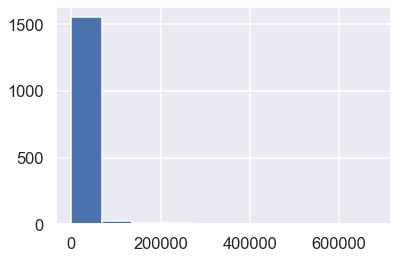

In [222]:
# histogram for number of votes
animated['numvotes'].hist();

We see from the histogram and descriptive statistics that the number of votes is highly skewed. The average will not be a useful metric for analyzing this column. We will use the median and quantiles to describe this feature.

In [273]:
# 90th percentile votes by runtime for animation
animated_rt_90th_votes = create_group(animated, groups='runtime_bins', aggregation=percentile(.9), sortby='numvotes')

# median votes by runtime for animation
animated_rt_median_votes = create_group(animated, groups='runtime_bins', aggregation='median', sortby='numvotes')

# 10th percentile votes by runtime for animation
animated_rt_10th_votes = create_group(animated, groups='runtime_bins', aggregation=percentile(.1), sortby='numvotes')

In [224]:
# set Seaborn style
sns.set_theme(context='talk')

<ipython-input-268-2dcf07cabcc4>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


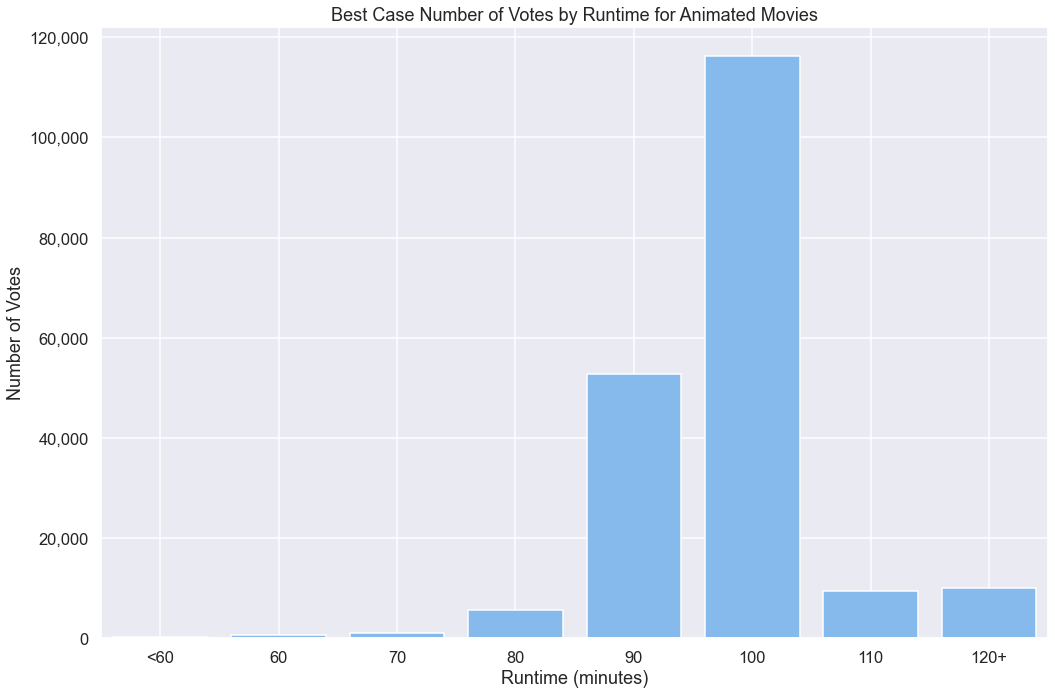

In [305]:
animated_rt_90th_votes_plot = make_barplot(animated_rt_90th_votes,                                               
                                           height='numvotes',
                                           title='Best Case Number of Votes by Runtime for Animated Movies',
                                           xlabel='Runtime (minutes)',
                                           ylabel='Number of Votes'
                                          )
animated_rt_90th_votes_plot.savefig('animation_90th')

<ipython-input-268-2dcf07cabcc4>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


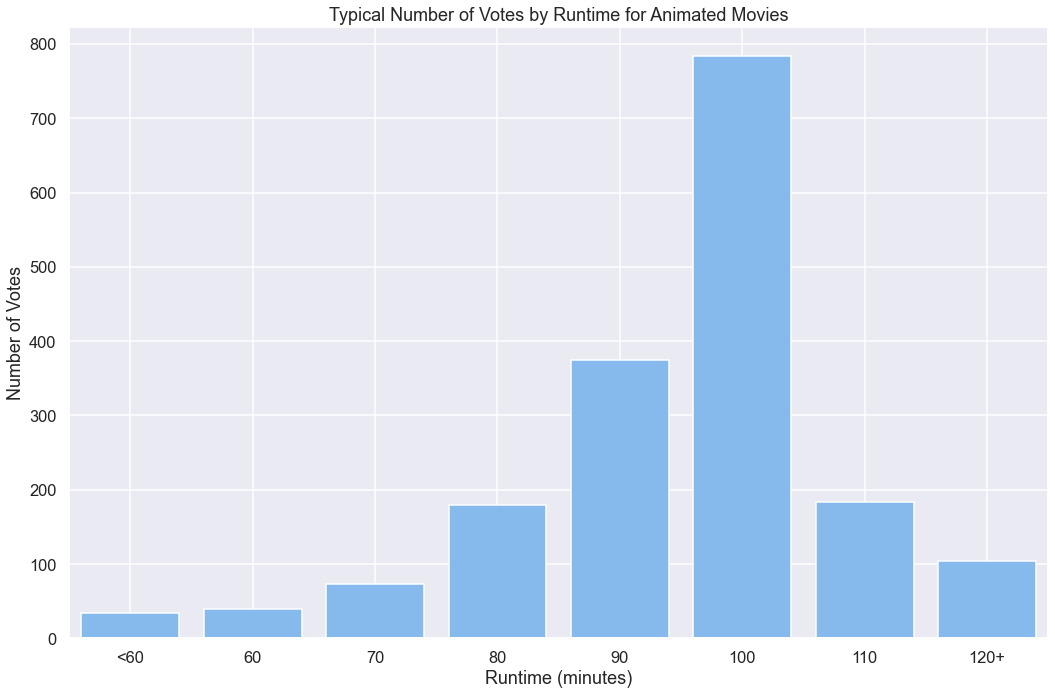

In [303]:
animated_rt_median_votes_plot = make_barplot(animated_rt_median_votes,                                             
                                             height='numvotes',
                                             title='Typical Number of Votes by Runtime for Animated Movies',
                                             xlabel='Runtime (minutes)',
                                             ylabel='Number of Votes'
                                             )

animated_rt_median_votes_plot.savefig('animation_median')

<ipython-input-268-2dcf07cabcc4>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


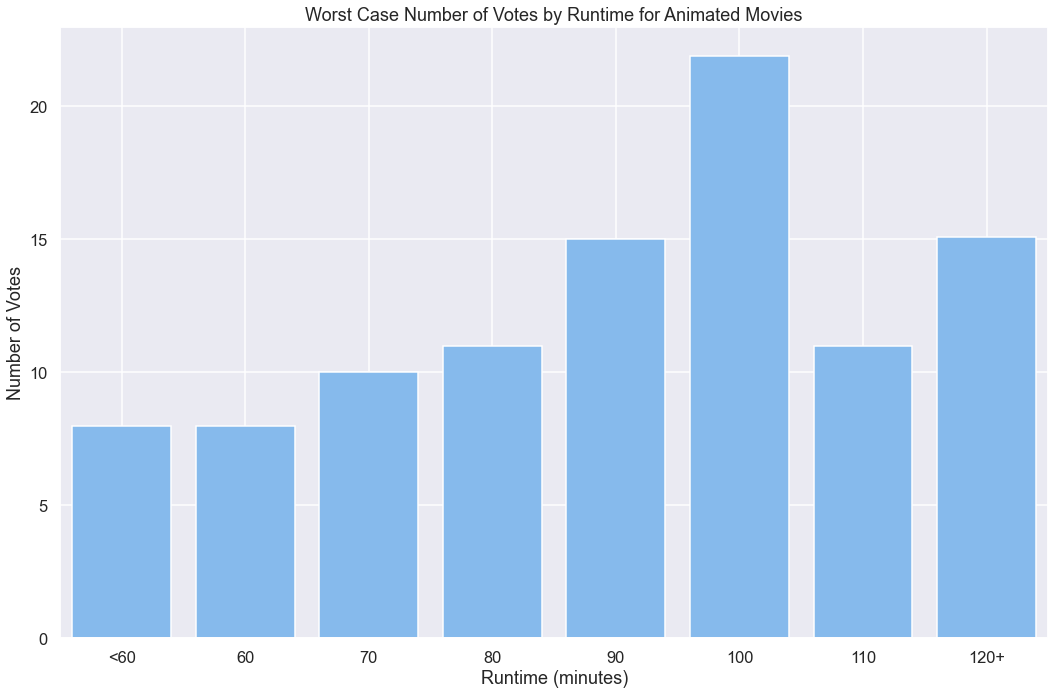

In [304]:
animated_rt_10th_votes_plot = make_barplot(animated_rt_10th_votes,                                               
                                           height='numvotes',
                                           title='Worst Case Number of Votes by Runtime for Animated Movies',
                                           xlabel='Runtime (minutes)',
                                           ylabel='Number of Votes'
                                          )
animated_rt_10th_votes_plot.savefig('animation_10th')

The 100-minute runtime is best in all cases. Next, let's calculate the lift in number of votes we get for a 100-minute movie.

In [299]:
def lift(ingroup, base_rate):
    return ((ingroup / base_rate) - 1) *100

In [300]:
# median number of votes for 100-minute animations
rt_100_median_votes = animated_rt_median_votes.loc[100]['numvotes']

# median number of votes for all animations
rt_median_votes = animated['numvotes'].median()

# lift
median_votes_lift = lift(rt_100_median_votes, rt_median_votes)

print(f'100-minute median: {rt_100_median_votes:.0f}\n' \
      f'overall median: {rt_median_votes:.0f}\n' \
      f'lift: {median_votes_lift:.0f}%')

100-minute median: 784
overall median: 121
lift: 548%


In [301]:
# 90th percentile number of votes for 100-minute animations
rt_100_90th_votes = animated_rt_90th_votes.loc[100]['numvotes']

# 90th percentile number of votes for all animations
rt_90th_votes = animated['numvotes'].quantile(0.9)

# lift
p90th_votes_lift = lift(rt_100_90th_votes, rt_90th_votes)

print(f'100-minute 90th: {rt_100_90th_votes:.0f}\n' \
      f'overall 90th: {rt_90th_votes:.0f}\n' \
      f'lift: {p90th_votes_lift:.0f}%')

100-minute 90th: 116288
overall 90th: 7413
lift: 1469%


In [302]:
# 10th percentile number of votes for 100-minute animations
rt_100_10th_votes = animated_rt_10th_votes.loc[100]['numvotes']

# 10th percentile number of votes for all animations
rt_10th_votes = animated['numvotes'].quantile(0.1)

# lift
p10th_votes_lift = lift(rt_100_10th_votes, rt_10th_votes)

print(f'100-minute 10th: {rt_100_10th_votes:.0f}\n' \
      f'overall 10th: {rt_10th_votes:.0f}\n' \
      f'lift: {p10th_votes_lift:.0f}%')

100-minute 10th: 22
overall 10th: 10
lift: 119%


### Recommendation

**We recommend that the runtime for an animation movie be about 100 minutes.**

The 90th, 50th, and 10th percentile outcome for an animation with a runtime of 100 minutes is superior to its peers.

**Typically, a 100-minute animation increases the number of votes by 548%, or 6.48x.**
**In the best cases, a 100-minute animation yields a 15.69x multiple.**
**Even in the worst cases, a 100-minute animation is 2.29x better than its peers.**